Selecting features by target encoding was designed and utilized by data scientists from the University
of Melbourne in the KDD 2009 data science competition. This feature selection procedure is also a
ranking method and assesses the individual predictive power of each feature with respect to the
target.

The idea behind this method is to use the mean value of the target at each level of the variable as an
estimate of the target value. For categorical values, the mean value of the target for each category
was used as the prediction. For continuous variables, the authors first separated the variables into
intervals and then replaced each interval with the mean target value.

In summary, the procedure goes as follows:

• Divide the data into train and test sets.

• Sort continuous variables into discrete intervals.

• Determine the mean value of the target per level using the training set.

• Replace categories and intervals in the test set with the target mean.

• Calculate a performance metric, like the ROC-AUC or MSE.

According to the authors, this method has several advantages:

• Speed: computing the mean and quantiles (for the intervals) is computationally efficient.

• Robust to outliers: extreme values in continuous variables are incorporated into the external
intervals and, thus, do not skew the distribution.

• It does not require categorical encoding.

• Comparable between categorical and numerical variables.

• Captures non-linear relationships between variables and target.

In [1]:
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression

# to select the features
from sklearn.feature_selection import SelectKBest, SelectPercentile
import pandas as pd
import csv
import seaborn as sns
sns.set_theme(style="whitegrid")
from tabulate import tabulate
import missingno as msno
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import plotly.io as pio
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import make_scorer, mean_absolute_error, r2_score, mean_squared_error
import numpy as np

In [2]:
from feature_engine.encoding import RareLabelEncoder
from feature_engine.selection import SelectByTargetMeanPerformance

In [3]:
data = pd.read_csv('train.csv')
data

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.00
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.00
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.00
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.00
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,4,106.957877,53.095769,82.515384,43.135565,1.177145,1.254119,146.88130,15.504479,65.764081,...,3.555556,3.223710,3.519911,1.377820,0.913658,1,2.168889,0.433013,0.496904,2.44
21259,5,92.266740,49.021367,64.812662,32.867748,1.323287,1.571630,188.38390,7.353333,69.232655,...,2.047619,2.168944,2.038991,1.594167,1.337246,1,0.904762,0.400000,0.212959,122.10
21260,2,99.663190,95.609104,99.433882,95.464320,0.690847,0.530198,13.51362,53.041104,6.756810,...,4.800000,4.472136,4.781762,0.686962,0.450561,1,3.200000,0.500000,0.400000,1.98
21261,2,99.663190,97.095602,99.433882,96.901083,0.690847,0.640883,13.51362,31.115202,6.756810,...,4.690000,4.472136,4.665819,0.686962,0.577601,1,2.210000,0.500000,0.462493,1.84


In [4]:
data = data.drop_duplicates()
data = data.drop(columns=['number_of_elements'])
X = data.iloc[:, 0:-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0,
)

X_train.shape, X_test.shape

((14835, 80), (6358, 80))

In [6]:
sel = SelectByTargetMeanPerformance(
    bins=5,
    strategy='equal_frequency',
    scoring='r2',  
    cv=2,
    threshold=None,
    regression=True, 
)

sel.fit(X_train, y_train)



SelectByTargetMeanPerformance(cv=2, regression=True, scoring='r2',
                              strategy='equal_frequency')

In [7]:
sel.features_to_drop_

['mean_atomic_mass',
 'wtd_mean_atomic_mass',
 'gmean_atomic_mass',
 'wtd_gmean_atomic_mass',
 'range_atomic_mass',
 'wtd_range_atomic_mass',
 'std_atomic_mass',
 'wtd_std_atomic_mass',
 'mean_fie',
 'gmean_fie',
 'wtd_gmean_fie',
 'wtd_entropy_fie',
 'wtd_range_fie',
 'mean_atomic_radius',
 'wtd_mean_atomic_radius',
 'gmean_atomic_radius',
 'wtd_gmean_atomic_radius',
 'wtd_range_atomic_radius',
 'mean_Density',
 'wtd_mean_Density',
 'entropy_Density',
 'wtd_entropy_Density',
 'range_Density',
 'wtd_range_Density',
 'std_Density',
 'wtd_std_Density',
 'mean_ElectronAffinity',
 'wtd_mean_ElectronAffinity',
 'gmean_ElectronAffinity',
 'wtd_gmean_ElectronAffinity',
 'wtd_entropy_ElectronAffinity',
 'wtd_range_ElectronAffinity',
 'range_FusionHeat',
 'std_FusionHeat',
 'wtd_std_FusionHeat',
 'wtd_mean_ThermalConductivity',
 'gmean_ThermalConductivity',
 'wtd_gmean_ThermalConductivity',
 'entropy_ThermalConductivity',
 'wtd_entropy_ThermalConductivity',
 'range_Valence',
 'std_Valence',
 'w

In [8]:
sel.feature_performance_

{'mean_atomic_mass': 0.11921161355468107,
 'wtd_mean_atomic_mass': 0.12652642883670207,
 'gmean_atomic_mass': 0.22120248589063374,
 'wtd_gmean_atomic_mass': 0.1879965679179017,
 'entropy_atomic_mass': 0.34911072056960146,
 'wtd_entropy_atomic_mass': 0.47298732517702125,
 'range_atomic_mass': 0.20889279167731573,
 'wtd_range_atomic_mass': 0.16378454003450887,
 'std_atomic_mass': 0.15725369527351085,
 'wtd_std_atomic_mass': 0.21060316481542746,
 'mean_fie': 0.1493242332778248,
 'wtd_mean_fie': 0.28337017496574585,
 'gmean_fie': 0.0797131876301227,
 'wtd_gmean_fie': 0.19049551458259728,
 'entropy_fie': 0.3388106070185236,
 'wtd_entropy_fie': 0.23154507869686863,
 'range_fie': 0.4836105912311741,
 'wtd_range_fie': 0.19505395050502972,
 'std_fie': 0.4191575938211306,
 'wtd_std_fie': 0.42743959003268384,
 'mean_atomic_radius': 0.10862430468669199,
 'wtd_mean_atomic_radius': 0.1766611240450931,
 'gmean_atomic_radius': 0.19547000315075325,
 'wtd_gmean_atomic_radius': 0.2578790905302909,
 'entr

Text(0.5, 1.0, 'Feature performance based on target encoding')

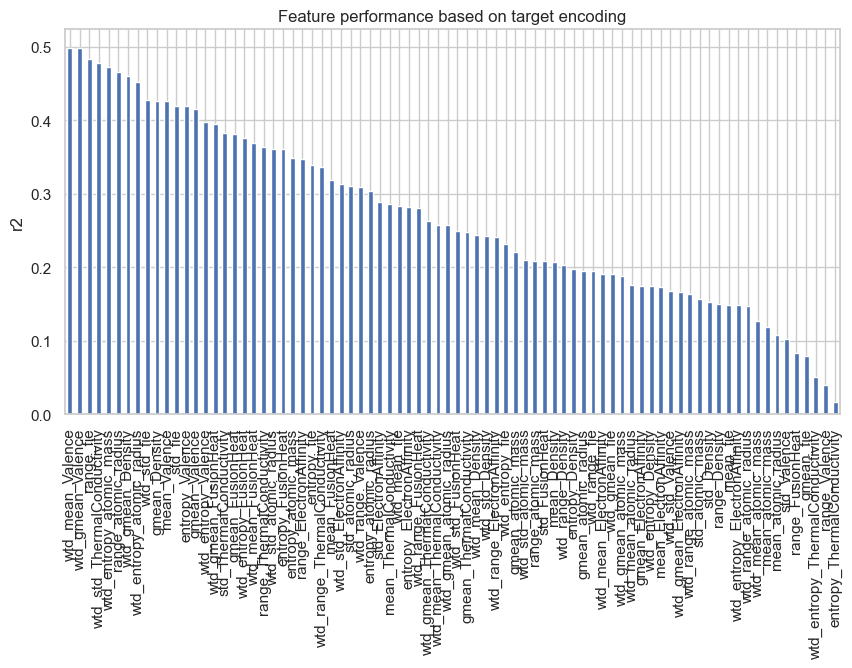

In [11]:
pd.Series(sel.feature_performance_).sort_values(
    ascending=False).plot.bar(figsize=(10, 5))

plt.ylabel('r2')
plt.title('Feature performance based on target encoding')

In [10]:
X_train_t = sel.transform(X_train)
X_test_t = sel.transform(X_test)

X_train_t.shape, X_test_t.shape

((14835, 37), (6358, 37))